In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Modelos de Séries Temporais

Exemplo da AULA - SÉRIES TEMPORAIS - Prof. Dr. Fabiano Guasti Lima <BR>
AULA MINISTRADA EM R E TRADUZIDA PARA PYTHON COMO FORMA DE APRENDIZADO.

Conjunto de observações ordenadas no tempo.

A série deve conter dados identados ao longo do tempo, ou seja, não deve haver furos ao longo do tempo. <br> 
Deve ser preenchidos com técnicas adequadas para cada caso.


# Base Petr4

In [4]:
basepetr4 = pd.read_excel(r'bases\basepetr4.xlsx')
basepetr4

,Data,Volume,Fechamento,Abertura,Mínimo,Maximo
0,2020-01-02 00:00:00,37774500,28.031314,27.857830,27.675216,28.031314
1,2020-01-03 00:00:00,71595600,27.803046,28.195667,27.803046,28.524373
2,2020-01-06 00:00:00,32822000,28.131752,27.784785,27.346510,28.250451
3,2020-01-07 00:00:00,48215600,28.022183,28.140883,27.821307,28.195667
4,2020-01-08 00:00:00,36102700,27.848700,28.022183,27.611301,28.095229
...,...,...,...,...,...,...
807,2023-03-29 16:56:00,73931200,23.900000,23.710000,23.470000,24.040000
808,2023-03-30 16:56:00,57505700,23.970000,24.250000,23.680000,24.280000
809,2023-03-31 16:56:00,59547800,23.450000,24.000000,23.210000,24.220000
810,2023-04-03 16:56:00,73931200,24.490000,24.090000,23.800000,24.500000


In [8]:
basepetr4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        812 non-null    datetime64[ns]
 1   Volume      812 non-null    int64         
 2   Fechamento  812 non-null    float64       
 3   Abertura    812 non-null    float64       
 4   Mínimo      812 non-null    float64       
 5   Maximo      812 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 38.2 KB


In [7]:
basepetr4.describe().round(2)

,Volume,Fechamento,Abertura,Mínimo,Maximo
count,8.120000e+02,812.00,812.00,812.00,812.00
mean,7.780160e+07,25.54,25.55,25.11,25.98
std,3.877004e+07,5.21,5.19,5.15,5.24
min,2.406000e+07,10.31,10.11,9.91,11.12
25%,5.298992e+07,21.66,21.71,21.32,22.03
50%,6.853160e+07,26.10,26.02,25.72,26.50
75%,9.162595e+07,29.05,29.00,28.56,29.28
max,4.902304e+08,37.72,37.65,36.85,38.39


In [9]:
# Cotação de Fechamento

petr4 = basepetr4.Fechamento

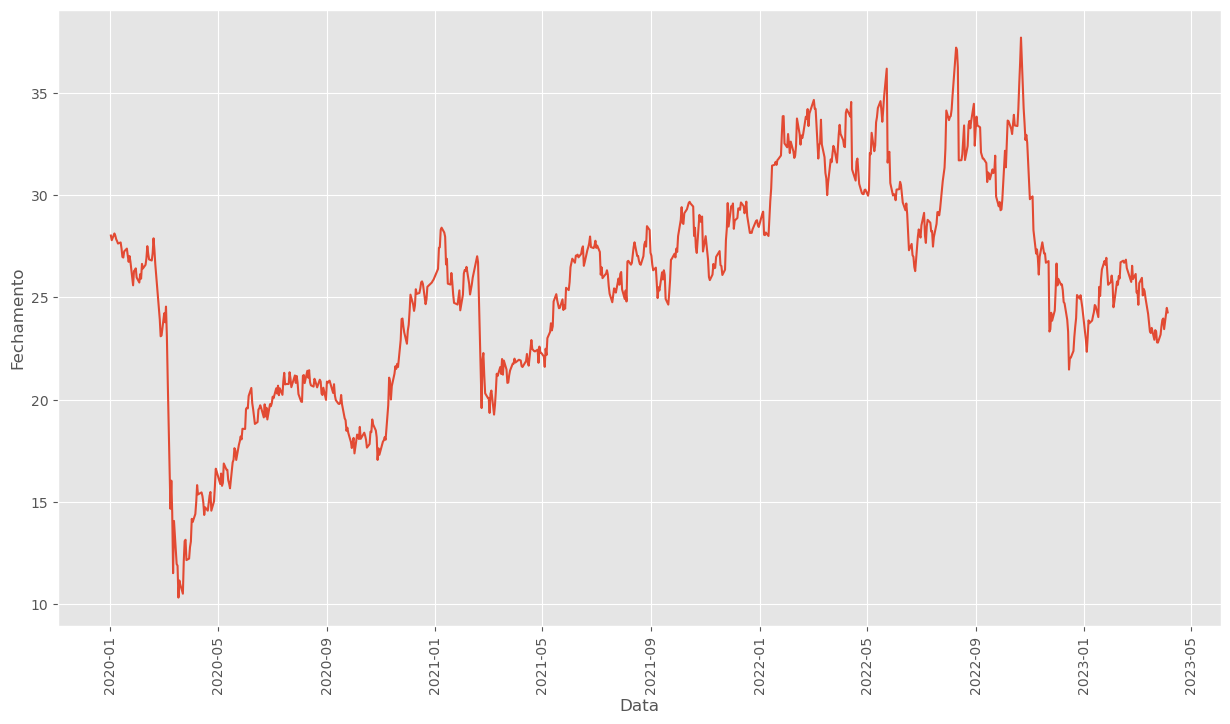

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(basepetr4.Data, petr4)
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.xticks(rotation=90)
plt.show()

In [32]:
# Considerando as demais informações
volume = basepetr4.Volume
minimo = basepetr4.Mínimo
abertura = basepetr4.Abertura

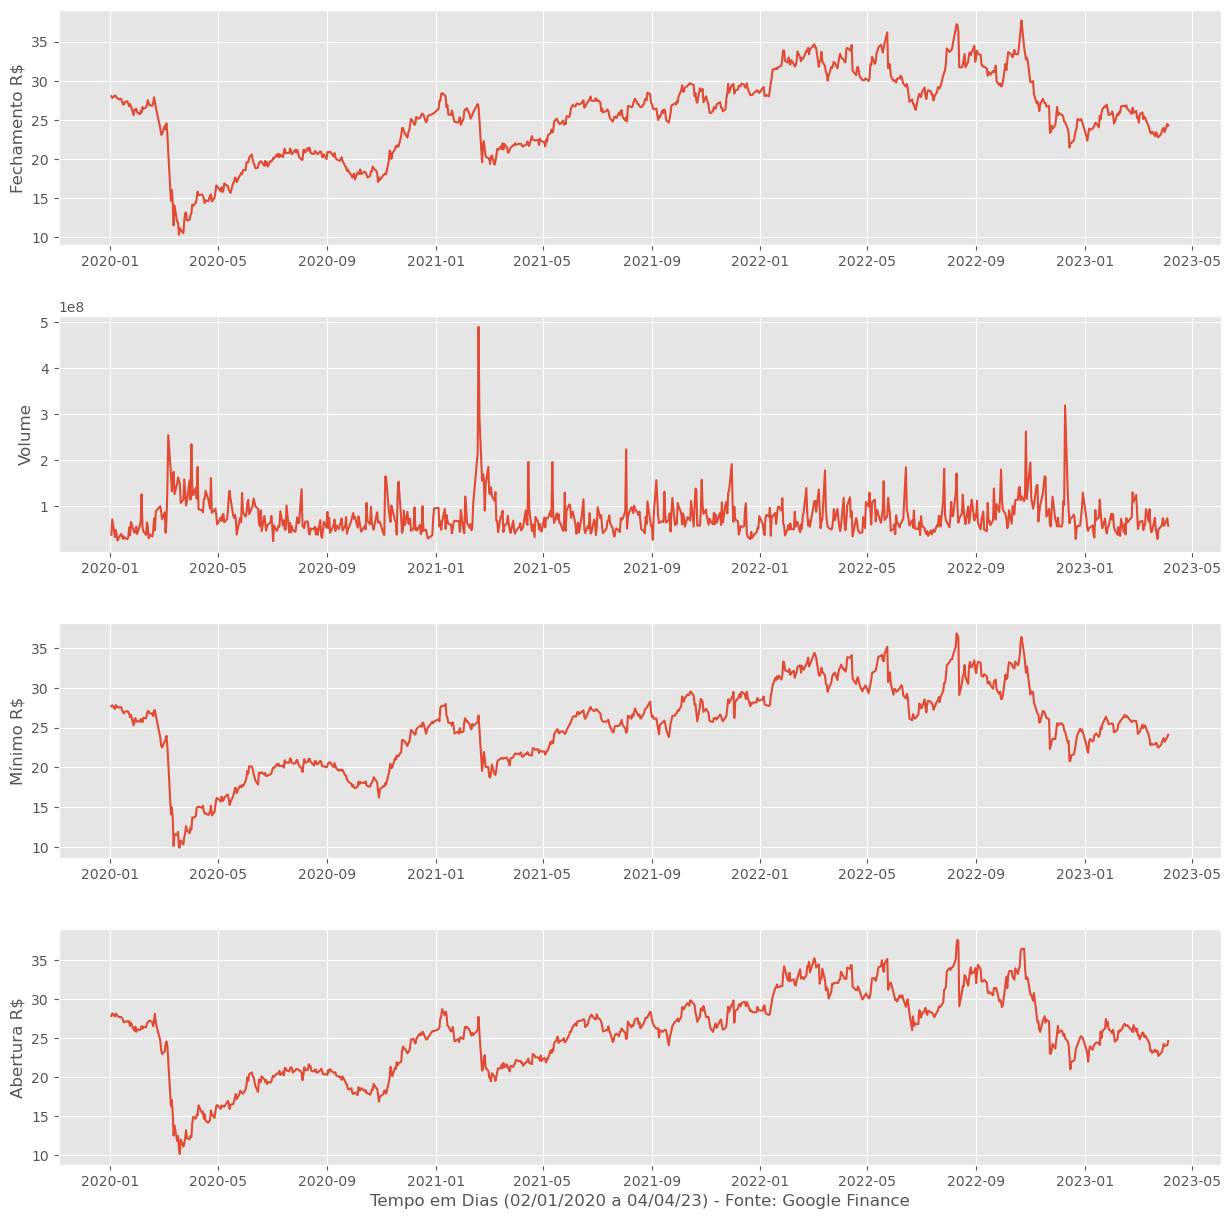

In [51]:
plt.style.use('ggplot')
fig, axes = plt.subplots(4, figsize=(15,15))

axes[0].plot(basepetr4.Data, petr4)
axes[0].set_ylabel('Fechamento R$')

axes[1].plot(basepetr4.Data, volume)
axes[1].set_ylabel('Volume')

axes[2].plot(basepetr4.Data, minimo)
axes[2].set_ylabel('Mínimo R$')

axes[3].plot(basepetr4.Data, abertura, label='Abertura')
axes[3].set_ylabel('Abertura R$')

plt.subplots_adjust(hspace=0.3)
plt.xlabel('Tempo em Dias (02/01/2020 a 04/04/23) - Fonte: Google Finance')
plt.show()

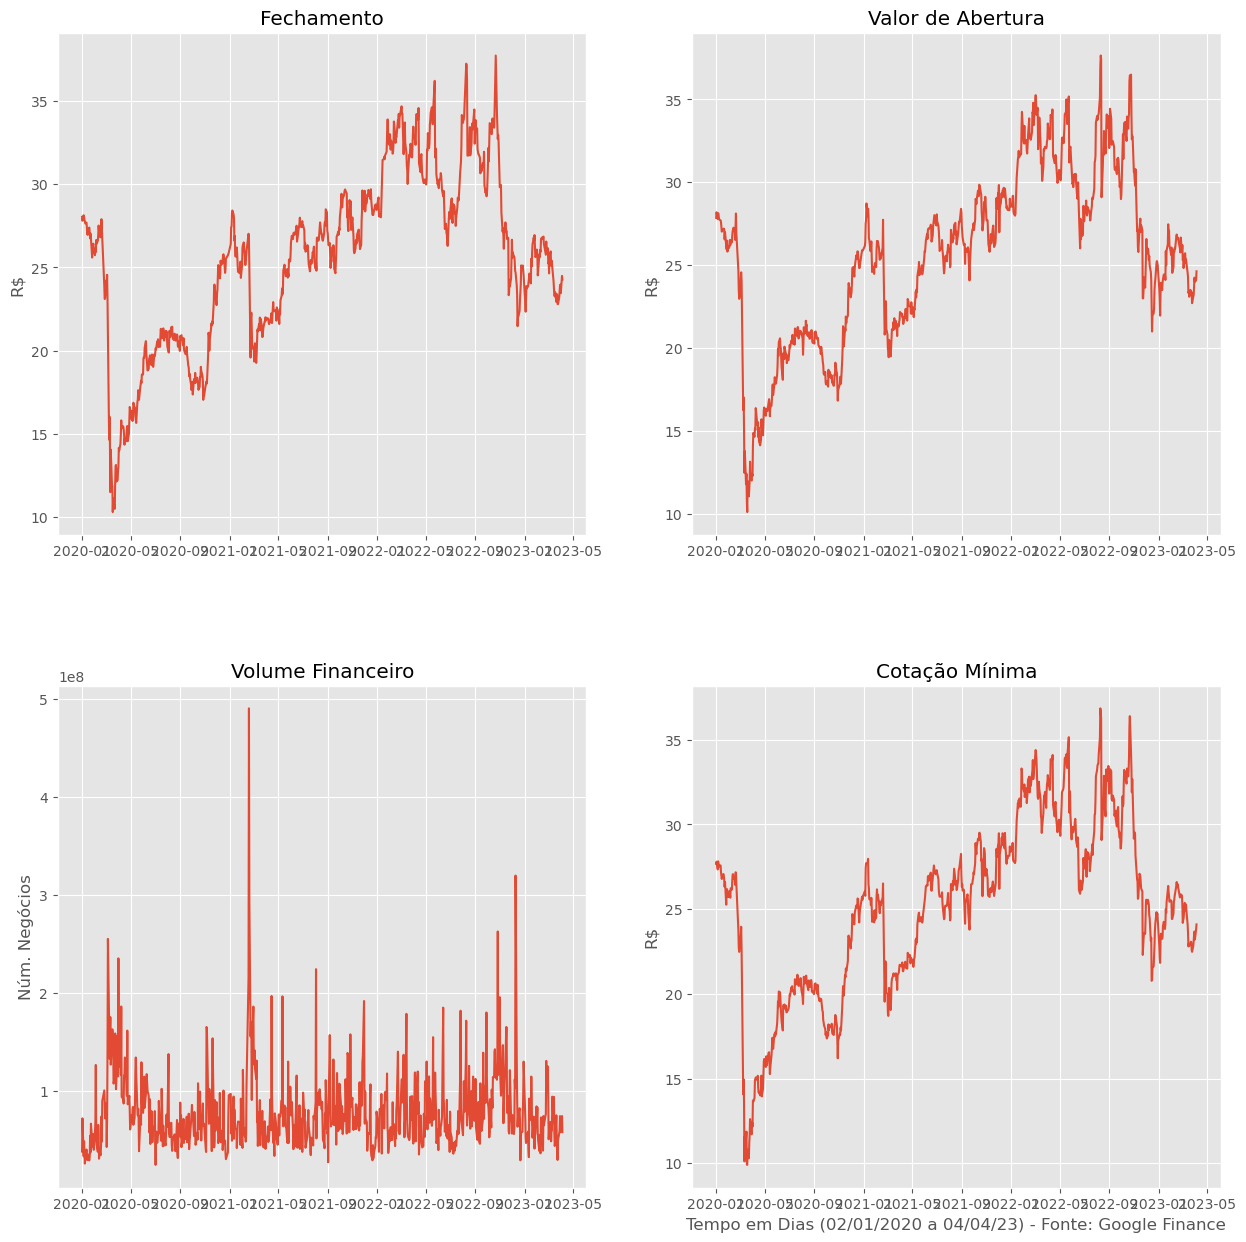

In [59]:
plt.style.use('ggplot')
fig, axes = plt.subplots(2,2, figsize=(15,15))

axes[0,0].plot(basepetr4.Data, petr4)
axes[0,0].set_ylabel('R$')
axes[0,0].set_title('Fechamento')

axes[1,0].plot(basepetr4.Data, volume)
axes[1,0].set_ylabel('Núm. Negócios')
axes[1,0].set_title('Volume Financeiro')

axes[1,1].plot(basepetr4.Data, minimo)
axes[1,1].set_ylabel('R$')
axes[1,1].set_title('Cotação Mínima')

axes[0,1].plot(basepetr4.Data, abertura, label='Abertura')
axes[0,1].set_ylabel('R$')
axes[0,1].set_title('Valor de Abertura')

plt.subplots_adjust(hspace=0.3)
plt.xlabel('Tempo em Dias (02/01/2020 a 04/04/23) - Fonte: Google Finance')
plt.show()

# Base Passageiros

In [61]:
passag = pd.read_excel('bases\passageiros.xlsx')
passag

,Data,passageiros
0,2011-01-01,8894294
1,2011-02-01,7212406
2,2011-03-01,8326063
3,2011-04-01,8365816
4,2011-05-01,8148295
...,...,...
141,2022-10-01,6140814
142,2022-11-01,6484554
143,2022-12-01,7331772
144,2023-01-01,7525560


In [62]:
passag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         146 non-null    datetime64[ns]
 1   passageiros  146 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


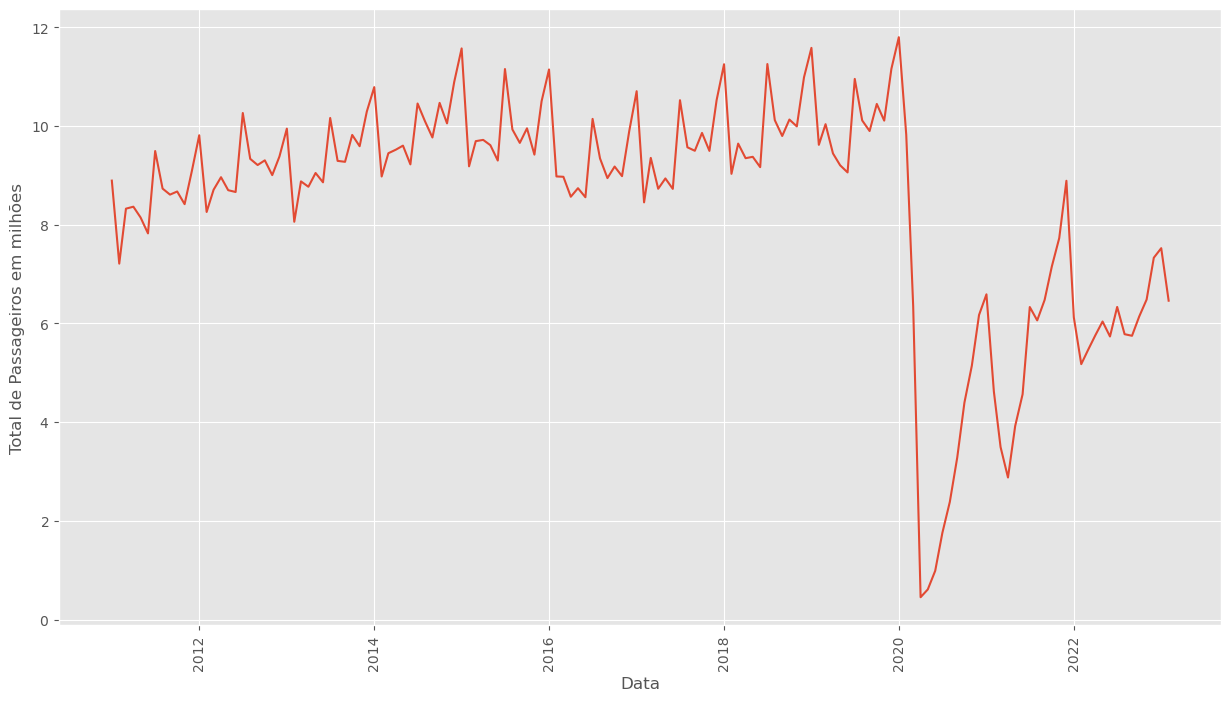

In [93]:
from matplotlib.ticker import ScalarFormatter

plt.style.use('ggplot')
plt.figure(figsize=(15,8))

plt.plot(passag.Data, passag.passageiros/1000000)
plt.xlabel('Data')
plt.ylabel('Total de Passageiros em milhões')
plt.xticks(rotation=90)

#Retira a notação científica caso queira
formatter = ScalarFormatter(useOffset=False, useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-10,100))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# Base AMBEV


Receita Acumulada

Receita Trimestre

In [109]:
ambev = pd.read_excel(r'bases\ambev.xlsx')
ambev

,Data,receita_ac,receita_t
0,2000-03-31,877498,877498
1,2000-06-30,1690009,812511
2,2000-09-30,3522524,1832515
3,2000-12-31,5250345,1727821
4,2001-03-31,1515505,1515505
...,...,...,...
87,2021-12-31,72854344,22010833
88,2022-03-31,18439152,18439152
89,2022-06-30,36428147,17988995
90,2022-09-30,57015789,20587642


In [110]:
ambev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        92 non-null     datetime64[ns]
 1   receita_ac  92 non-null     int64         
 2   receita_t   92 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.3 KB


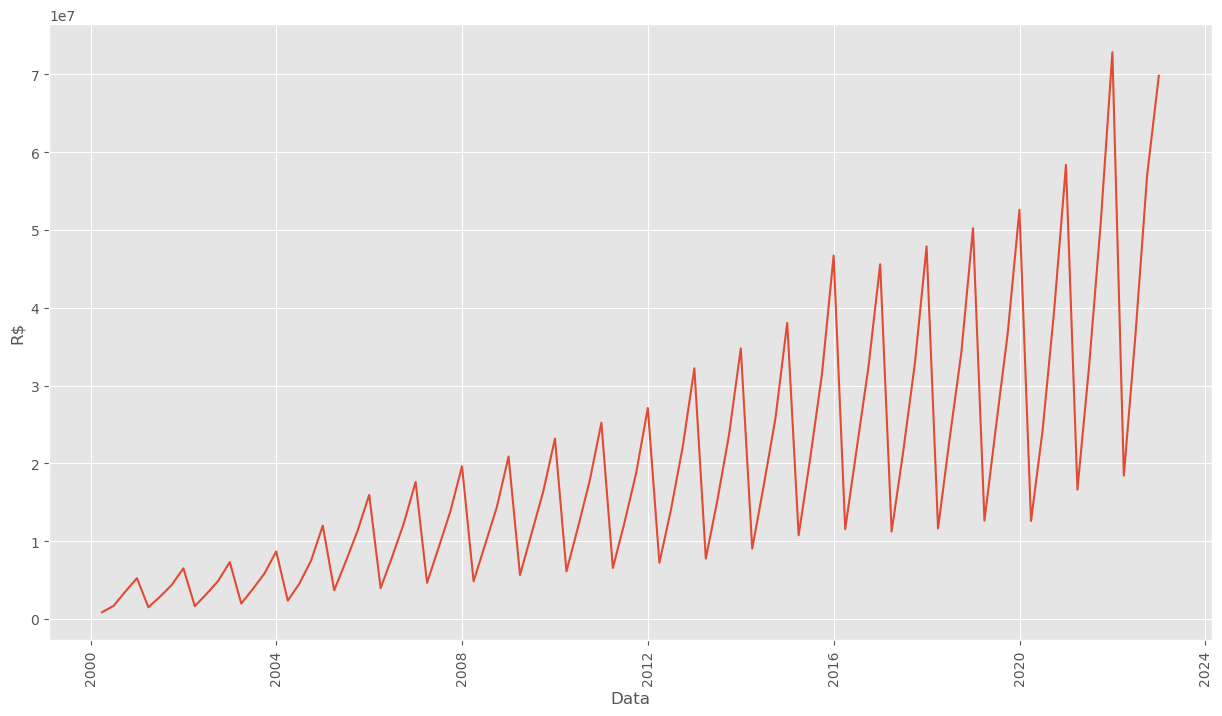

In [112]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(ambev.Data, ambev.receita_ac)
plt.xlabel('Data')
plt.ylabel('R$')
plt.xticks(rotation=90)
plt.show()

In [119]:
#Criando Receita Trimestral
trimestre = ambev.set_index('Data').resample('Q').sum()
trimestre.T

Data,2000-03-31,2000-06-30,2000-09-30,2000-12-31,2001-03-31,2001-06-30,2001-09-30,2001-12-31,2002-03-31,2002-06-30,...,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-31
receita_ac,877498,1690009,3522524,5250345,1515505,2867381,4375013,6525585,1661506,3205448,...,39822425,58378995,16639761,32350902,50843511,72854344,18439152,36428147,57015789,69832525
receita_t,877498,812511,1832515,1727821,1515505,1351876,1507632,2150572,1661506,1543942,...,15604498,18556570,16639761,15711141,18492609,22010833,18439152,17988995,20587642,12816736


# Base Manchas Solares

In [131]:
manchas = pd.read_excel('bases\manchas.xlsx')
manchas['Ano'] = manchas['Ano'].astype('category')
manchas['meses'] = manchas['meses'].astype('category')
manchas

,Ano,meses,manchas
0,1749,1,96.7
1,1749,2,104.3
2,1749,3,116.7
3,1749,4,92.8
4,1749,5,141.7
...,...,...,...
3286,2022,11,77.6
3287,2022,12,113.1
3288,2023,1,143.6
3289,2023,2,110.9


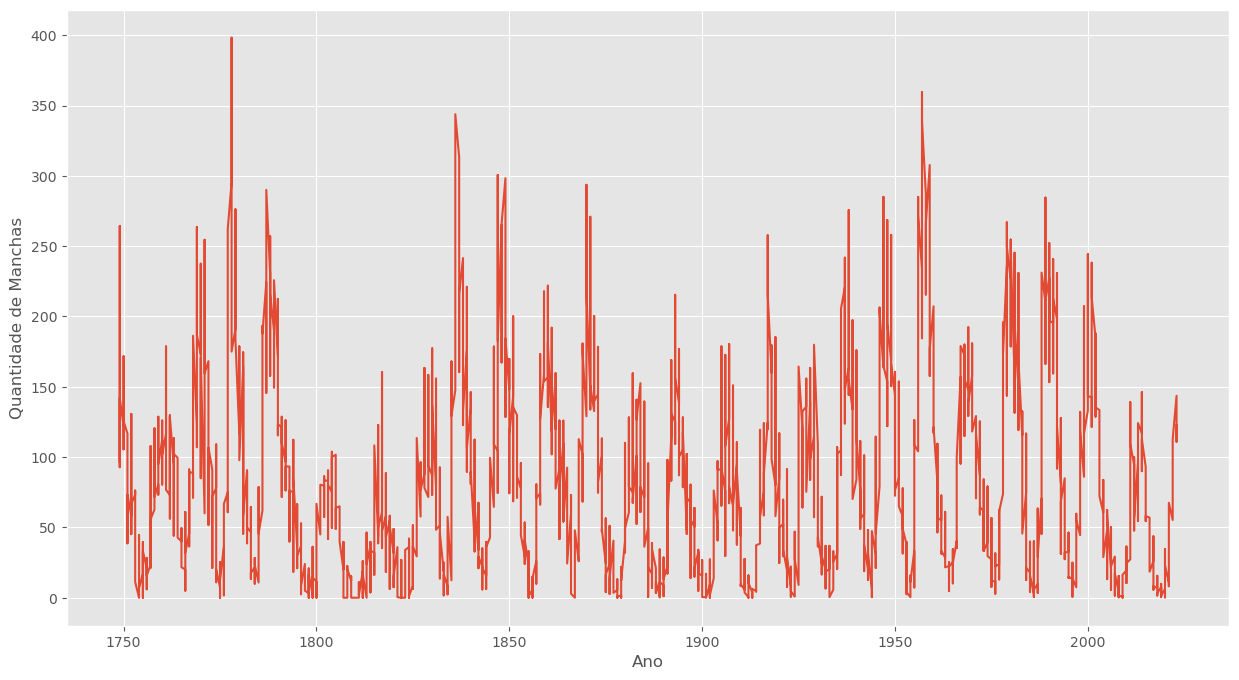

In [123]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(manchas.Ano, manchas.manchas)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Manchas')
plt.xticks(rotation=0)
plt.show()

In [132]:
manchas.describe().round(2)

,manchas
count,3291.00
mean,81.65
std,67.71
min,0.00
25%,24.00
50%,67.20
75%,122.40
max,398.20


# Dados Aleatórios

In [139]:
aleat = np.random.normal(size=500, loc=0, scale=1)

In [141]:
aleat.mean(), aleat.std()

(0.04259045337733647, 0.9818930882363975)

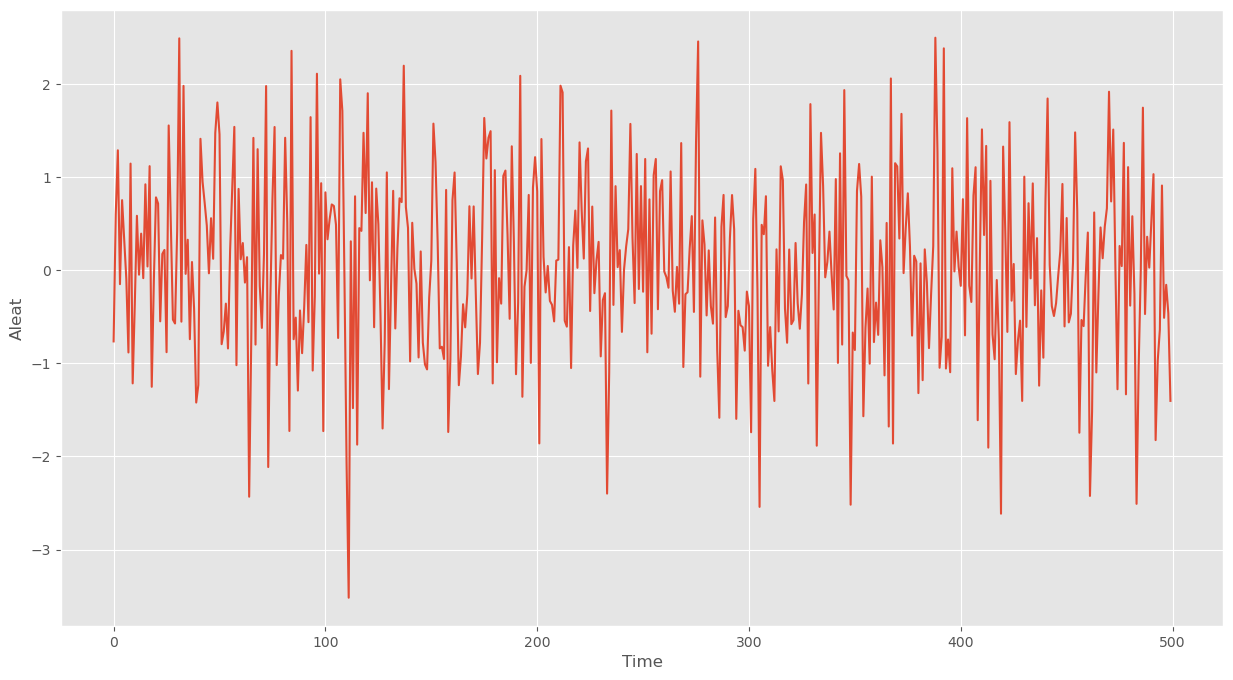

In [140]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(aleat)
plt.xlabel('Time')
plt.ylabel('Aleat')
plt.xticks(rotation=0)
plt.show()

In [133]:
aleat1 = np.random.normal(size=500, loc=2, scale=0.1)

In [138]:
aleat1.mean(), aleat1.std()

(2.000273688388916, 0.09986938458413)

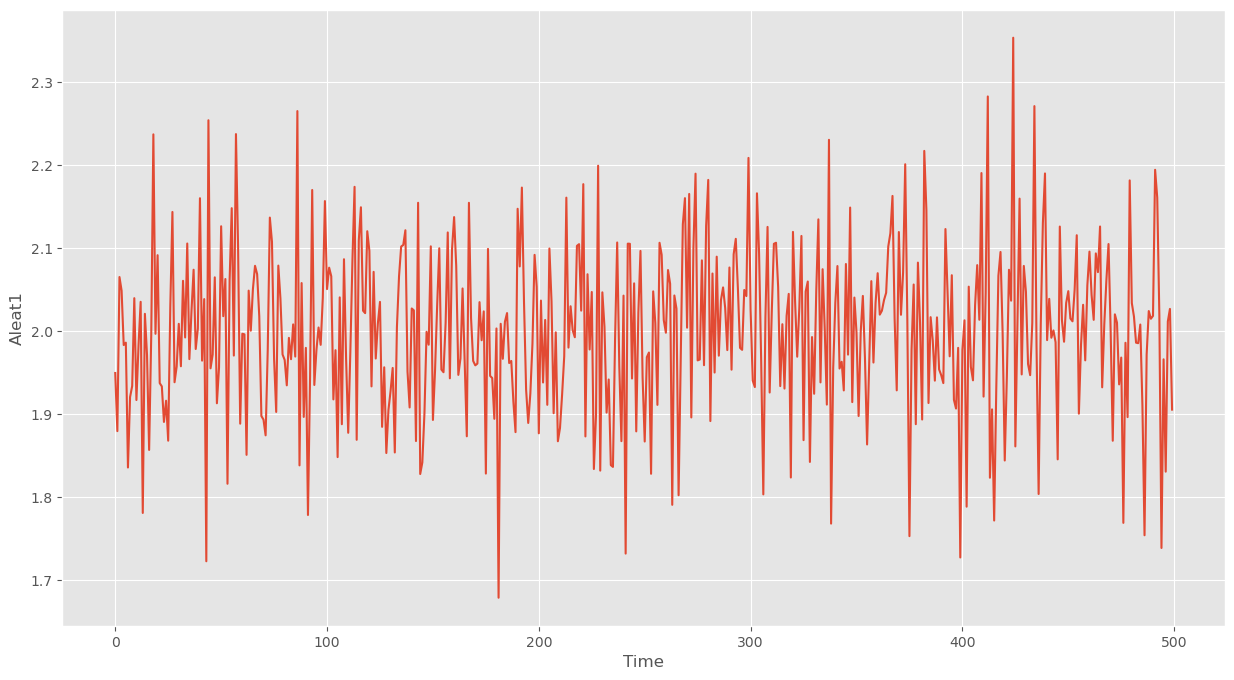

In [142]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(aleat1)
plt.xlabel('Time')
plt.ylabel('Aleat1')
plt.xticks(rotation=0)
plt.show()

## Passeio Aleatório

In [143]:
passeio = np.cumsum(aleat)

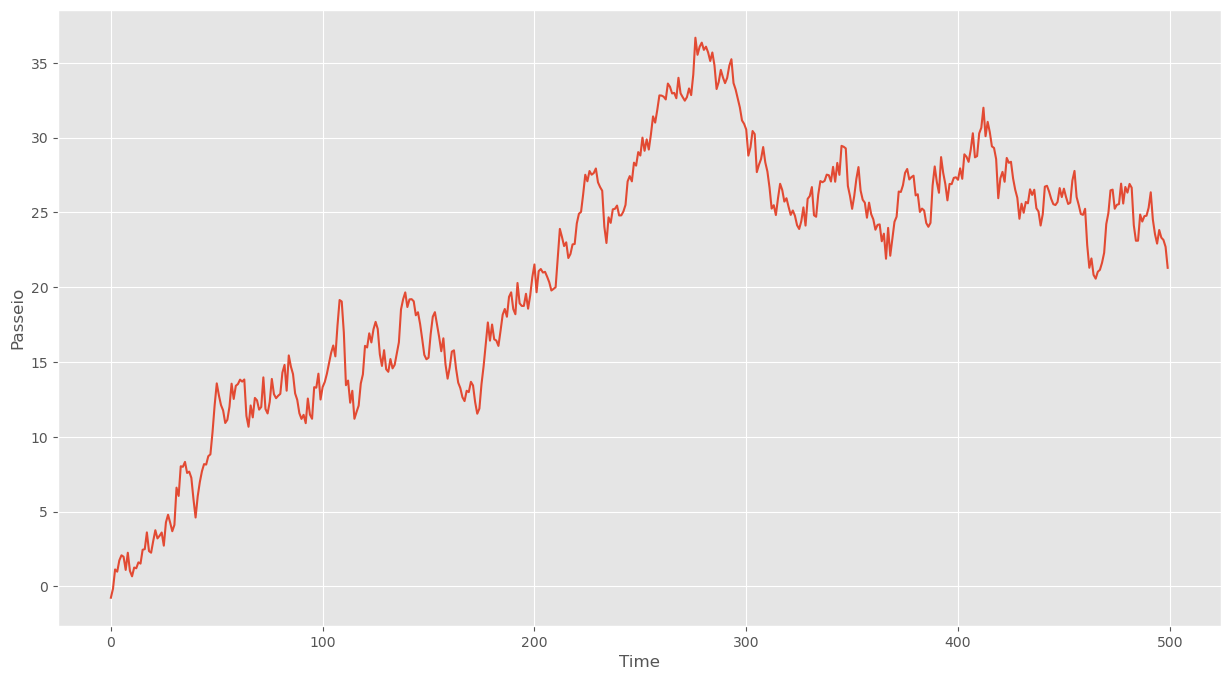

In [144]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(passeio)
plt.xlabel('Time')
plt.ylabel('Passeio')
plt.xticks(rotation=0)
plt.show()

## Passeio Aleatório Petr4

Simulando comportamento de uma série temporal

In [167]:
petropasseio = [petr4[0]]
for i in range(1, len(petr4)):
    petropasseio.append(petropasseio[i-1]+(np.random.normal(loc=0, scale=1)))

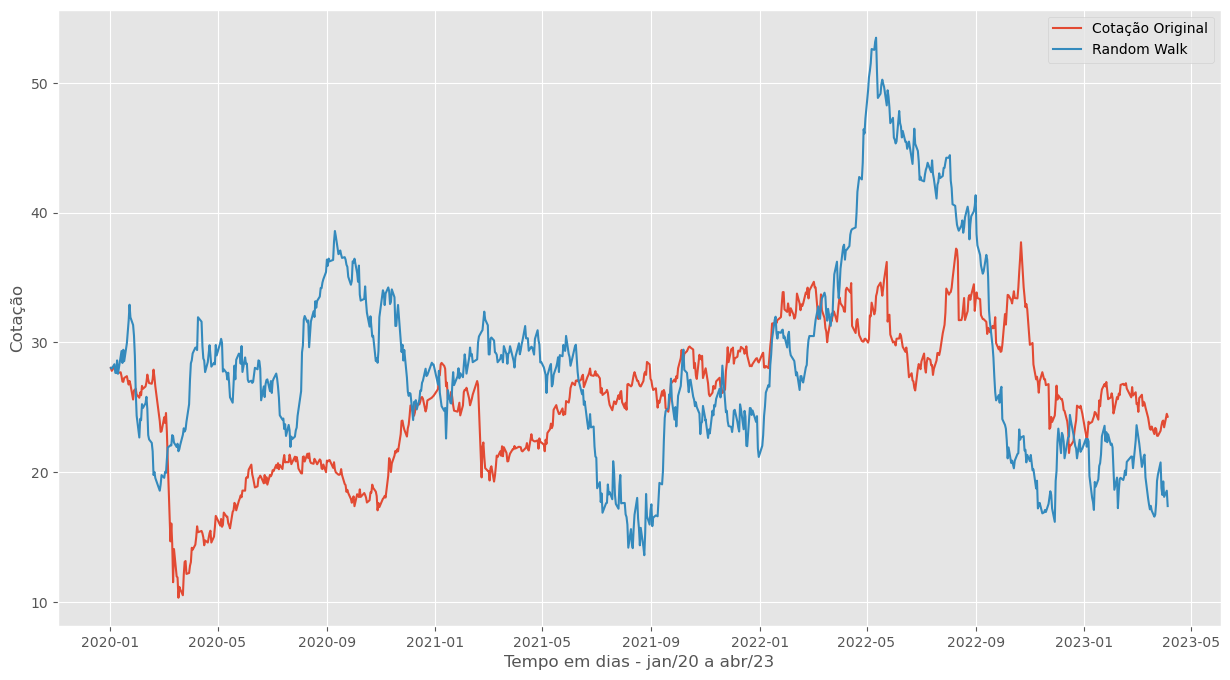

In [173]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))

plt.plot(basepetr4.Data, petr4, label='Cotação Original')
plt.plot(basepetr4.Data, petropasseio, label='Random Walk')
plt.xlabel('Tempo em dias - jan/20 a abr/23')
plt.ylabel('Cotação')
plt.legend()
plt.xticks(rotation=0)
plt.show()

# DECOMPOSIÇÃO DE SÉRIES TEMPORAIS

- **Média Móvel:** principal elemento de tendência para mostrar um comportamento;

### Componentes de uma Série Temporal

> **Tendência:** movimento oculto dos dados seguindo uma direção (crescente, decrescente ou estacionária);

> **Sazonal:** flutuações regulares dentro de um período completo. Tipo de padrão que se repete normalmente dentro de um ano;

> **Cíclica:** flutuações de LONGO prazo nos dados e são similares aos fatores sazonais. Padrão que se repete com regularidade mas sem período fixo;

In [3]:
covid = pd.read_excel('bases\covid.xlsx')
covid = covid.set_index('Data')
covid

,total,por_dia
Data,,
2020-02-26,1,1
2020-02-27,1,0
2020-02-28,1,0
2020-02-29,2,1
2020-03-01,2,0
...,...,...
2023-03-28,37258663,0
2023-03-29,37258663,0
2023-03-30,37258663,0


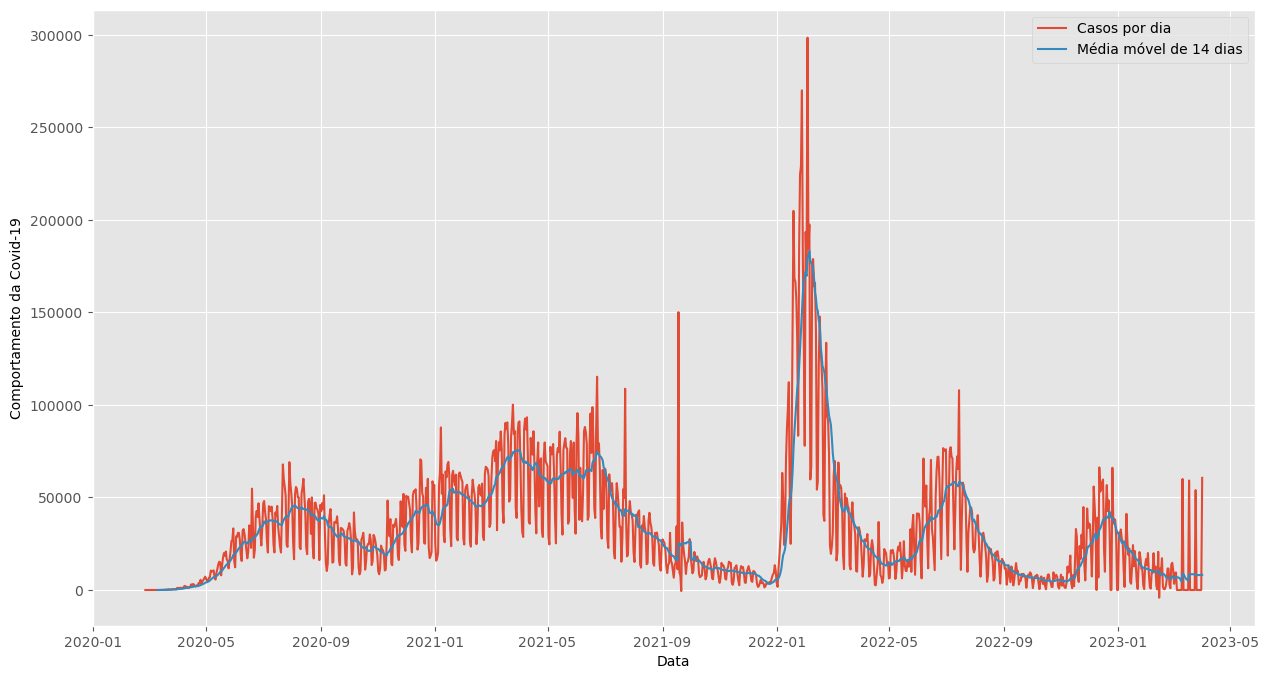

In [4]:
# Calcula a média móvel de 7 dias
media_movel = covid.por_dia.rolling(window=14).mean()

#Plotando o Gráfico
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(covid.por_dia, label='Casos por dia')
plt.plot(media_movel, label='Média móvel de 14 dias')
plt.xlabel('Data')
plt.ylabel('Comportamento da Covid-19')
plt.legend()
plt.xticks(rotation=0)
plt.show()

### Detectar Outlier com BoxPlot

Text(0, 0.5, 'Comportamento da Covid-19')

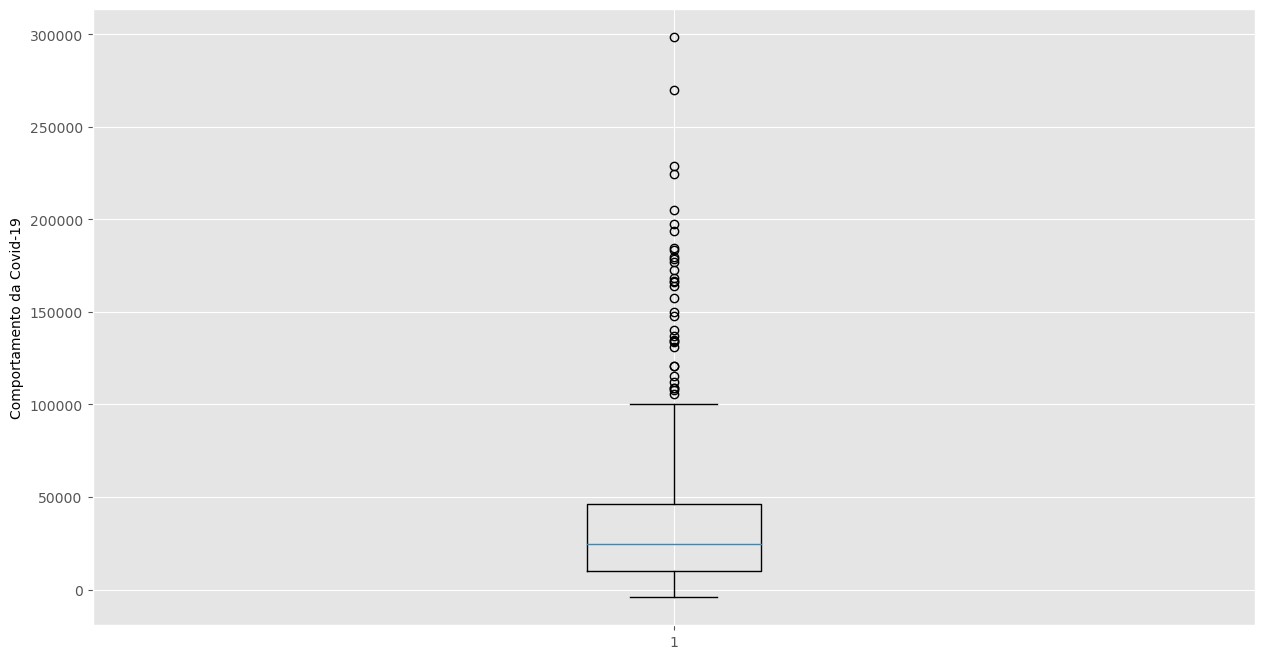

In [105]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.boxplot(covid.por_dia)
plt.ylabel('Comportamento da Covid-19')

### Limpando Outliers

In [6]:
# Limpando Outlier Usando Função da Biblioteca Stats
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html
from scipy.stats.mstats import winsorize

covid['suavizado'] = winsorize(covid.por_dia, limits=[0.03, 0.03])

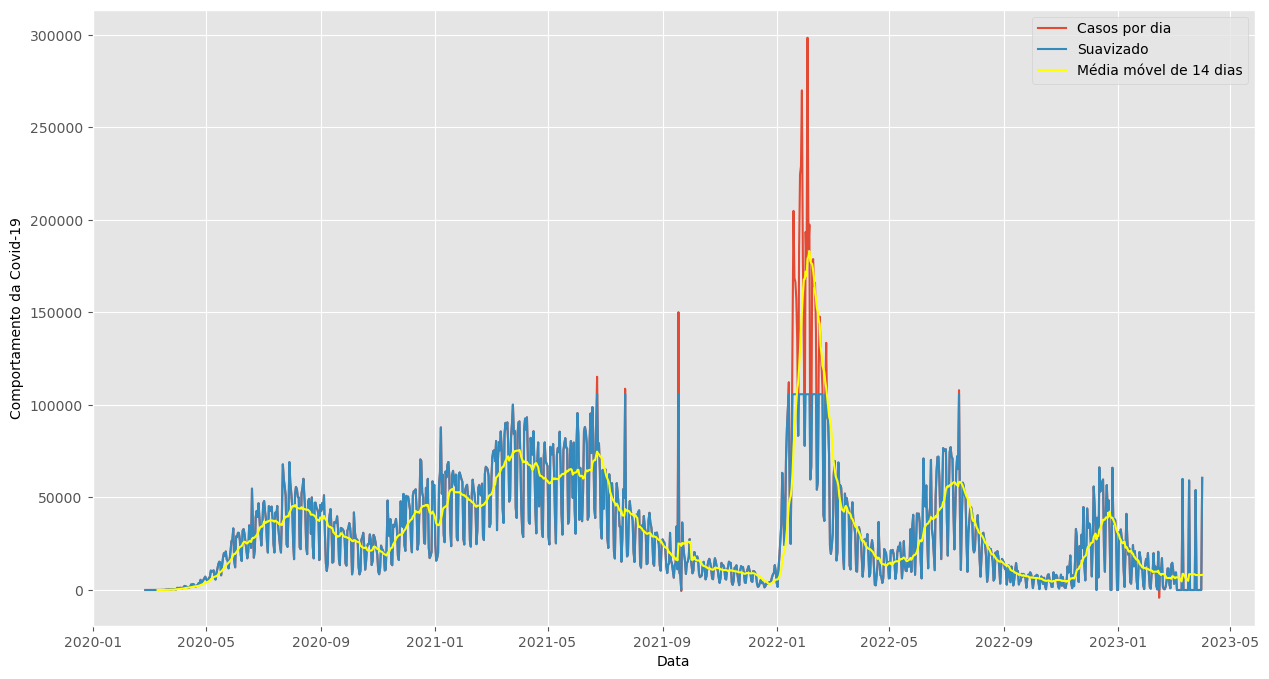

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(covid.por_dia, label='Casos por dia')
plt.plot(covid.suavizado, label='Suavizado')
plt.plot(media_movel, label='Média móvel de 14 dias', color='yellow')
plt.xlabel('Data')
plt.ylabel('Comportamento da Covid-19')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [119]:
# Cálculo Manual da Suzvização - Média de t-1 com t+1 de t outlier

# Incluindo primeiro valor na Lista
suavizado = [covid['por_dia'][0]]       
        
for i in range(1, len(covid['por_dia']) - 1):
    if covid['por_dia'][i] > 100000:
        suavizado.append((covid['por_dia'][i - 1] + covid['por_dia'][i + 1]) / 2)
    else:
        suavizado.append(covid['por_dia'][i])

# Incluindo último valor na lista
suavizado.append(covid['por_dia'][1130])

# Criando Coluna Suavizado
covid['suavizado'] = suavizado

Text(0, 0.5, 'Comportamento da Covid-19')

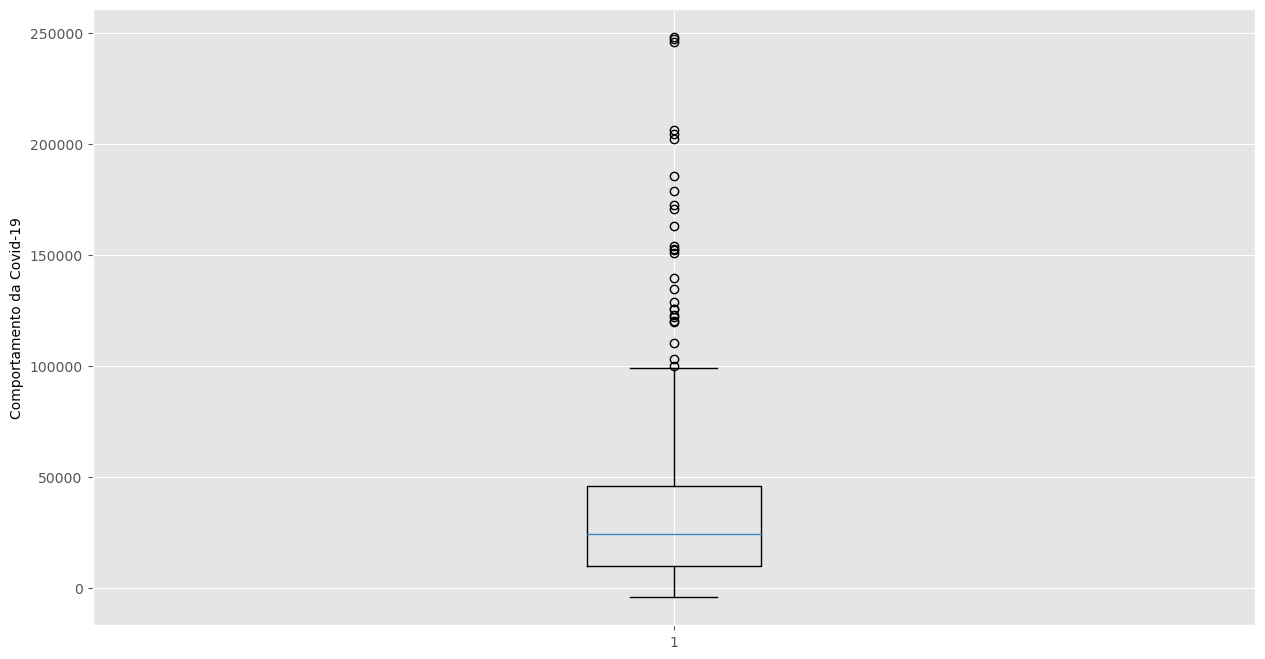

In [120]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.boxplot(covid.suavizado)
plt.ylabel('Comportamento da Covid-19')

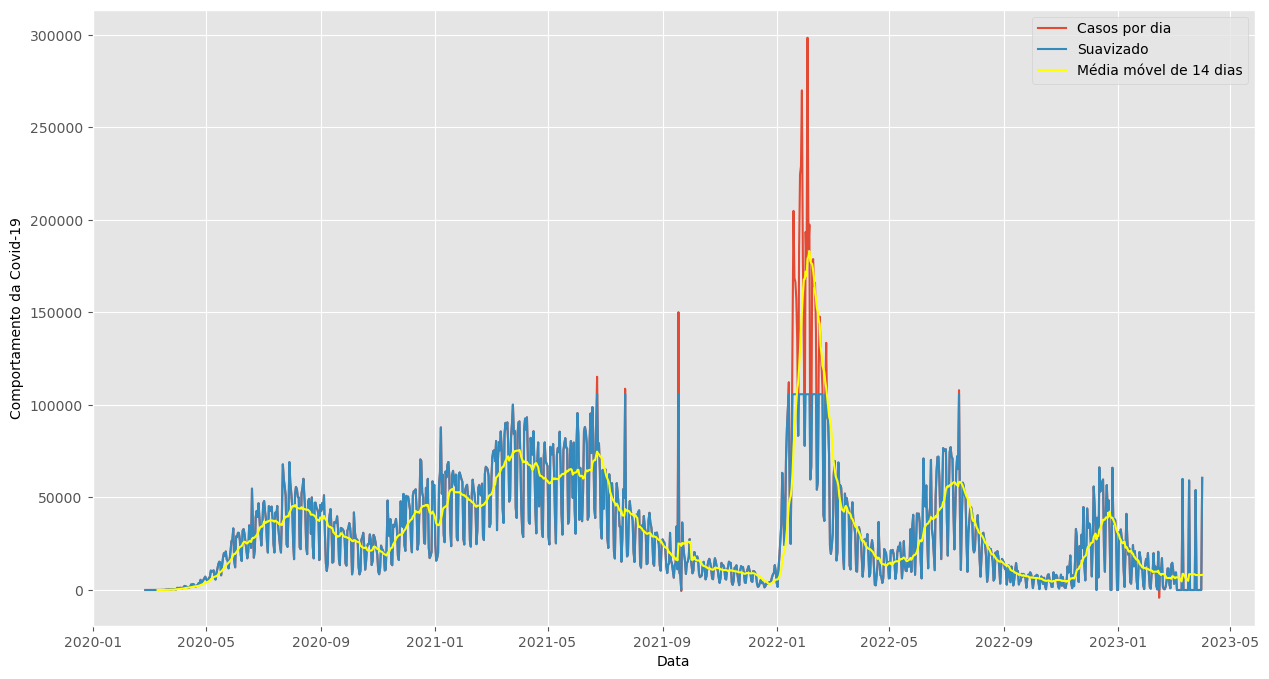

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(covid.por_dia, label='Casos por dia')
plt.plot(covid.suavizado, label='Suavizado')
plt.plot(media_movel, label='Média móvel de 14 dias', color='yellow')
plt.xlabel('Data')
plt.ylabel('Comportamento da Covid-19')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [102]:
# Apoio para Encontrar um exemplo de outlier e conferir o cálculo suavizado
covid.loc[(covid['total'] >= 18054653)]

,total,por_dia,suavizado
Data,,,
2021-06-22,18054653,87822,87822.0
2021-06-23,18169881,115228,80712.0
2021-06-24,18243483,73602,73602.0
2021-06-25,18322760,79277,79277.0
2021-06-26,18386894,64134,64134.0
...,...,...,...
2023-03-28,37258663,0,0.0
2023-03-29,37258663,0,0.0
2023-03-30,37258663,0,0.0


# Decomposição de Séries Temporais

# Aditiva

In [19]:
#Criando o DataFrame

# criar o índice de datas trimestrais
datas = pd.date_range('2019Q1', '2023Q1', freq='Q')

valores = [10,14,8,25,16,22,14,35,15,27,18,40,28,40,25,65,]

# criar a série temporal com dados trimestrais
serie_temporal = pd.Series(valores, index=datas)

In [21]:
serie_temporal

2019-03-31    10
2019-06-30    14
2019-09-30     8
2019-12-31    25
2020-03-31    16
2020-06-30    22
2020-09-30    14
2020-12-31    35
2021-03-31    15
2021-06-30    27
2021-09-30    18
2021-12-31    40
2022-03-31    28
2022-06-30    40
2022-09-30    25
2022-12-31    65
Freq: Q-DEC, dtype: int64

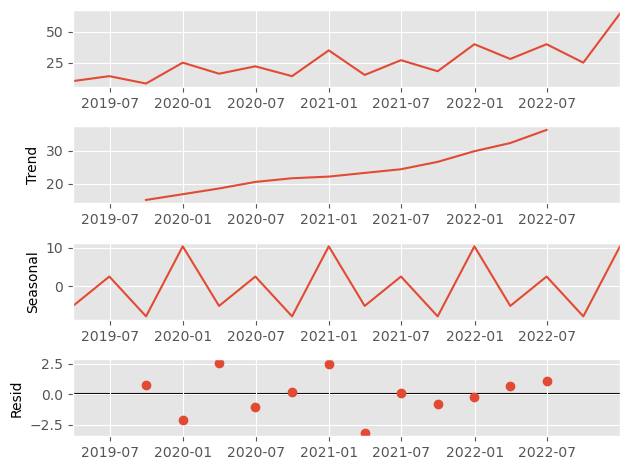

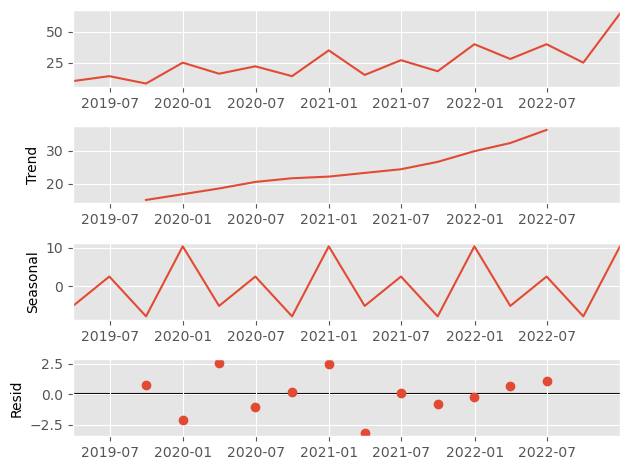

In [25]:
import statsmodels.api as sm

# decomposição da série temporal
decomposicao = sm.tsa.seasonal_decompose(serie_temporal, model='additive')

# exibindo os resultados
decomposicao.plot()

In [26]:
# extrair as componentes em um DataFrame
componentes = pd.DataFrame({
    'tendencia': decomposicao.trend,
    'sazonalidade': decomposicao.seasonal,
    'residuos(C+E)': decomposicao.resid
})

In [27]:
componentes

,tendencia,sazonalidade,residuos(C+E)
2019-03-31,NaN,-5.093750,NaN
2019-06-30,NaN,2.531250,NaN
2019-09-30,15.000,-7.802083,0.802083
2019-12-31,16.750,10.364583,-2.114583
2020-03-31,18.500,-5.093750,2.593750
2020-06-30,20.500,2.531250,-1.031250
2020-09-30,21.625,-7.802083,0.177083
2020-12-31,22.125,10.364583,2.510417
2021-03-31,23.250,-5.093750,-3.156250
2021-06-30,24.375,2.531250,0.093750


In [31]:
componentes['sazonalidade'].mean().round(3)

-0.0

## Multiplicativa

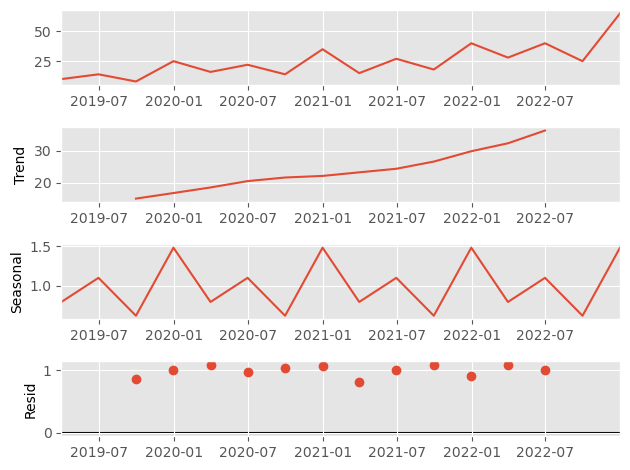

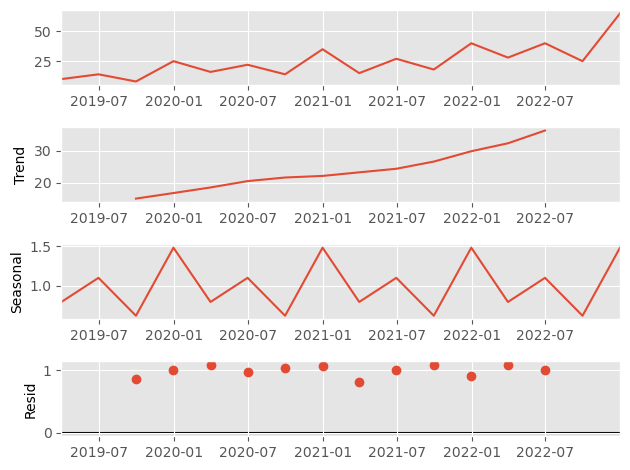

In [32]:
# decomposição da série temporal
decomposicao = sm.tsa.seasonal_decompose(serie_temporal, model='multiplicative')

# exibindo os resultados
decomposicao.plot()

In [33]:
# extrair as componentes em um DataFrame
componentes = pd.DataFrame({
    'tendencia': decomposicao.trend,
    'sazonalidade': decomposicao.seasonal,
    'residuos(C+E)': decomposicao.resid
})

componentes

,tendencia,sazonalidade,residuos(C+E)
2019-03-31,NaN,0.796571,NaN
2019-06-30,NaN,1.100331,NaN
2019-09-30,15.000,0.622792,0.856358
2019-12-31,16.750,1.480305,1.008263
2020-03-31,18.500,0.796571,1.085735
2020-06-30,20.500,1.100331,0.975316
2020-09-30,21.625,0.622792,1.039510
2020-12-31,22.125,1.480305,1.068645
2021-03-31,23.250,0.796571,0.809923
2021-06-30,24.375,1.100331,1.006690


In [34]:
componentes['sazonalidade'].mean().round(3)

1.0

# Decomposição do PIB

In [35]:
pib = pd.read_excel('bases\pib_mensal.xlsx', index_col='Data')

In [36]:
pib

,pib
Data,
2004-01-01,144558.6
2004-02-01,142861.3
2004-03-01,157363.5
2004-04-01,156953.9
2004-05-01,159498.9
...,...
2022-10-01,852550.0
2022-11-01,858355.9
2022-12-01,873219.8


<Axes: xlabel='Data'>

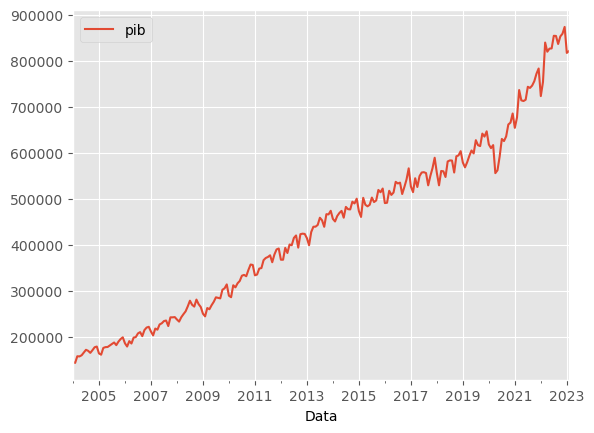

In [38]:
pib.plot()

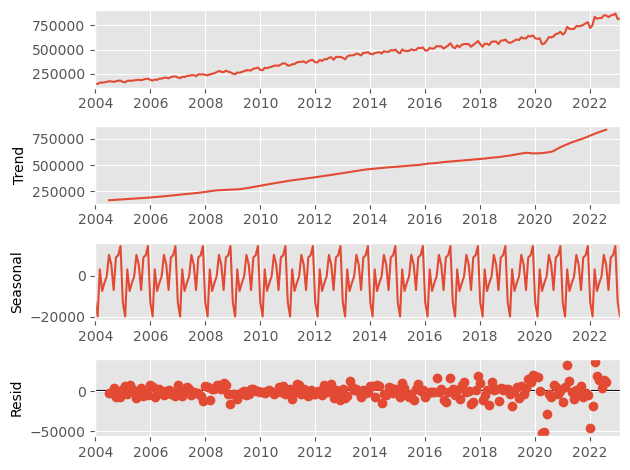

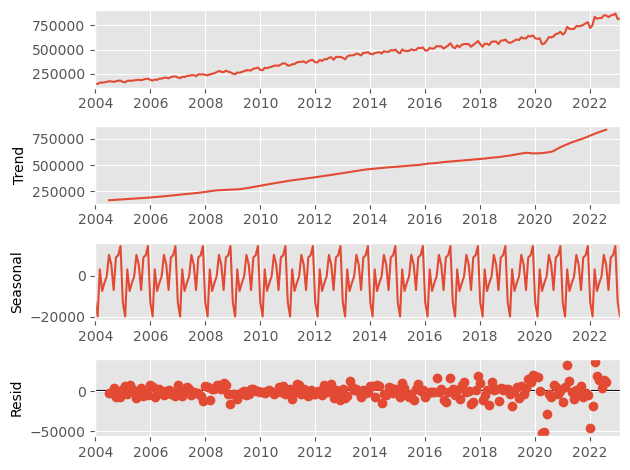

In [39]:
# decomposição da série temporal
decomposicao_pib = sm.tsa.seasonal_decompose(pib, model='aditive')

# exibindo os resultados
decomposicao_pib.plot()

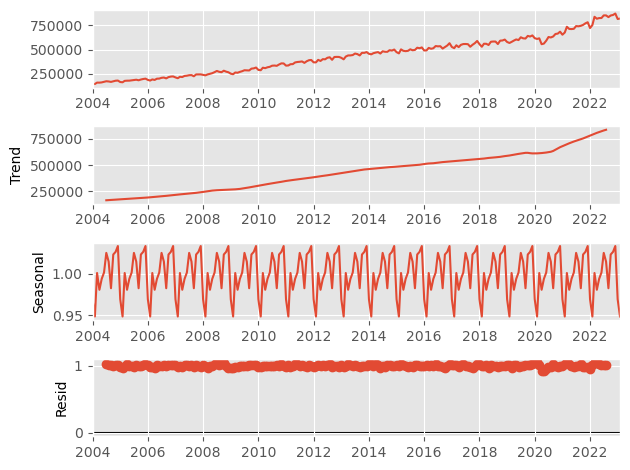

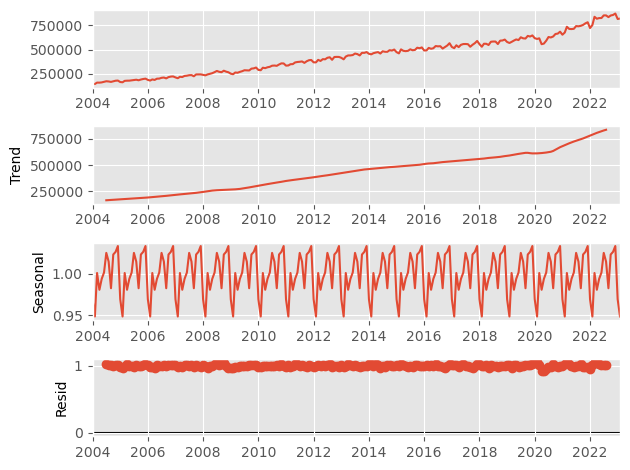

In [40]:
# decomposição da série temporal
decomposicao_pib = sm.tsa.seasonal_decompose(pib, model='multiplicative')

# exibindo os resultados
decomposicao_pib.plot()